This Jupyter Notebook will show how the code for this project was built.

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib
import os

# set working directory
os.chdir('C:\\Users\\Ken\\Google Drive\\TN Structure\\OG_initial_well_files')



In [2]:
# load in the Kentucky O&G well locations shapefile using geopandas
ky_well_locations = gpd.read_file('KY\\kyog_dd.shp')

print (ky_well_locations.head(10))

              API  KGS_Recno Letter  Number  Section   FNS NS   FEW EW  \
0            None          1      G      50        8  2030  S    60  W   
1  16001009480000          2      F      49        2   313  N   270  W   
2  16001037640000          3      F      49        2  2507  N  1299  W   
3  16001009490000          4      F      49        3   133  N   286  E   
4  16001019300000          5      F      49        3   550  S  2150  E   
5  16001013000000          6      F      49        8  2570  S  2290  W   
6  16001021200000          7      F      49        8  2570  N  2100  E   
7  16001026490000          8      F      49        8  2920  S   530  E   
8  16001026170000          9      F      49        8   400  S   190  E   
9  16001021030000         10      F      49        9  2720  S   880  W   

   Surf_Elev  ...  ELog PlotSymbol KGS_Permit  \
0      862.0  ...   GRN        LOC       None   
1      989.0  ...  None        TRM      48885   
2      985.0  ...  None        D&A    

In [3]:
#print(ky_well_locations.type)

Let's see what these locations look like by plotting them.

In [4]:
ky_wells_map = ky_well_locations.cx[:, :]

ky_map = ky_wells_map.plot(markersize=4)
ky_map.set_title('Kentucky well data locations' + str(ky_wells_map.crs))

Text(0.5, 1, "Kentucky well data locations{'init': 'epsg:4269'}")

In [5]:

duplicate_locations_count = ky_well_locations.duplicated(subset=['KGS_Recno', 'Rec_Lat83', 'Rec_Lng83'], keep='first').sum()

print('total duplicate entries:',duplicate_locations_count)

ky_well_locations.drop_duplicates(subset=['KGS_Recno', 'Rec_Lat83', 'Rec_Lng83'], keep='first', inplace=True)


total duplicate entries: 857


These duplicates are primarily due to the way information about certain wells was handled by KGS.

Text(0.5, 1, "Kentucky well data locations{'init': 'epsg:4269'}")

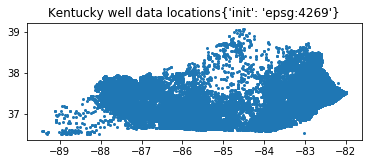

In [6]:
ky_wells_map = ky_well_locations.cx[:, :]

ky_map = ky_wells_map.plot(markersize=4)
ky_map.set_title('Kentucky well data locations' + str(ky_wells_map.crs))

Now load in the formation tops data and first check if there are any duplicate entries (there are).

In [8]:
ky_tops_data = pd.read_csv('KY\\KY_TOPS\\KY_FM_Tops_Data_csv_update.csv')


duplicate_tops_count = ky_tops_data.duplicated(subset=['record_number',
                                           'pick_fm_name',
                                           'fm_top_depth_ft',
                                           'comments',
                                           'source'], keep='first').sum()

print('total duplicate entries:',duplicate_tops_count)

total duplicate entries: 287


In [9]:
# drop the duplicates

ky_tops_data.drop_duplicates(subset=['record_number',
                                           'pick_fm_name',
                                           'fm_top_depth_ft',
                                           'comments',
                                           'source'], keep='first', inplace=True)

Now to combine the two datasets

In [14]:

ky_group = ky_tops_data.groupby(['record_number', 'pick_fm_name']).mean().reset_index()

print(ky_group.head)

<bound method NDFrame.head of         record_number                        pick_fm_name  Unnamed: 0  \
0                  15                      High Bridge Gp     70706.0   
1                  15                          Joachim Fm     74494.0   
2                  15                       Pecatonica Ls     73756.0   
3                  15  Pencil Cave Bentonite, High Bridge     72209.0   
4                  15                          Trenton Ls     68871.0   
5                  24                      High Bridge Gp     70707.0   
6                  24  Pencil Cave Bentonite, High Bridge     72210.0   
7                  45                      High Bridge Gp     70708.0   
8                  45                          Joachim Fm     74495.0   
9                  45              Ordovician, Upper Part     65808.0   
10                 45                       Pecatonica Ls     73757.0   
11                 45  Pencil Cave Bentonite, High Bridge     72211.0   
12                 45

In [15]:

kymerge = pd.merge(ky_tops_data, ky_group, how='inner', on=['record_number', 'pick_fm_name'])
kymerge['pick_delta'] = abs(kymerge.fm_top_depth_ft_x - kymerge.fm_top_depth_ft_y)

print (kymerge)

        Unnamed: 0_x  Unnamed: 0.1_x              comments       date_added  \
0                  0             NaN                   NaN              NaN   
1                  1             NaN                    sd              NaN   
2                  3             NaN                   NaN              NaN   
3                  4             NaN                   NaN              NaN   
4                  5             NaN                   NaN              NaN   
5                  6             NaN                   NaN              NaN   
6                  7             NaN                   NaN              NaN   
7                  8             NaN                   NaN              NaN   
8                  9             NaN                   NaN              NaN   
9                 10             NaN                   NaN              NaN   
10                11             NaN                   NaN              NaN   
11                12             NaN                

In [19]:
kymask = kymerge['pick_delta'] <= 20
kymasked = kymerge[kymask]

print(kymasked)

        Unnamed: 0_x  Unnamed: 0.1_x               comments       date_added  \
0                  0             NaN                    NaN              NaN   
1                  1             NaN                     sd              NaN   
2                  3             NaN                    NaN              NaN   
3                  4             NaN                    NaN              NaN   
4                  5             NaN                    NaN              NaN   
5                  6             NaN                    NaN              NaN   
6                  7             NaN                    NaN              NaN   
7                  8             NaN                    NaN              NaN   
8                  9             NaN                    NaN              NaN   
9                 10             NaN                    NaN              NaN   
10                11             NaN                    NaN              NaN   
11                12             NaN    

In [ ]:
# load TN files (converted from .xls files to .csv files)
tnogtopcsv = pd.read_excel('C:\\Users\\Ken\\Google Drive\\TN Structure\\OG_initial_well_files\\TN\\Tops_A.xls',header=0)

tnogtop = tnogtopcsv.drop(['SECTN',
                         'TOWNSHIP',
                         'RANGE',
                         'FEETEW',
                         'EW',
                         'FEETNS',
                         'NS',
                         'TSPEAST83',
                         'TSPNRTH83',
                         'LATDEG83',
                         'LATMIN83',
                         'LATSEC83',
                         'LONDEG83',
                         'LONMIN83',
                         'LONSEC83',
                         'LATDEG27',
                         'LATMIN27',
                         'LATSEC27',
                         'LONDEG27',
                         'LONMIN27',
                         'LONSEC27',
                           'PERMIT'
                         ], axis=1)

print (tnogtop)

tnogloccsv = pd.read_csv(
    'C:\\Users\\Ken\Google Drive\\TN Structure\\OG_initial_well_files\\TN\\TNOG0617_A.csv',
    header=0)

tnogloc = tnogloccsv.drop(['SECTN',
                         'TOWNSHIP',
                         'RANGE',
                         'FEETEW',
                         'EW',
                         'FEETNS',
                         'NS',
                         'QUAD',
                         'COUNTYNAME',
                         'FIELDTYPE',
                         'FIELDPOOL',
                         'ELEMEA',
                         'PERMDT',
                         'OPNAME',
                         'PROPTD',
                         'PROPFORM',
                         'LOGTD',
                         'TDSYST',
                         'TDFORM',
                         'TDFRMEST',
                         'CASEDESC',
                         'RESULT',
                         'GASTEST',
                         'IPGAS',
                         'OILTEST',
                         'IPOIL',
                         'PRESS01',
                         'PRESSTYP01',
                         'PRESS02',
                         'PRESTYP02',
                         'CHOKE',
                         'SPUDDT',
                         'TDDATE',
                         'LOGLOW',
                         'LOGHIGH',
                         'LOGTP01',
                         'LOGTP02',
                         'LOGTP03',
                         'LOGTP04',
                         'LOGTP05',
                         'LOGTP06',
                         'LOGTP07',
                         'LOGTP08',
                         'LOGTP09',
                         'LOGTP10',
                         'LOGTP11',
                         'LOGTP12',
                         'LOGTP13',
                         'LOGTP14',
                         'LOGTP15',
                         'PLUGDATE',
                         'SAMPRECDT',
                         'SAMPSTUDY',
                         'SAMPTYPE',
                         'SSDATE',
                         'SS1',
                         'SS2',
                         'SS3',
                         'SSLOW',
                         'SSHIGH',
                         'LATDEG83',
                         'LATMIN83',
                         'LATSEC83',
                         'LONDEG83',
                         'LONMIN83',
                         'LONSEC83',
                         'LATDEG27',
                         'LATMIN27',
                         'LATSEC27',
                         'LONDEG27',
                         'LONMIN27',
                         'LONSEC27',
                         'TSPEAST83',
                         'TSPNRTH83',
                         'WHRECDT',
                         'RVRBSN',
                         'RPTMON',
                         'RPTYEA'], axis=1)


tnogksbpickscsv = pd.read_csv(
    'C:\\Users\\Ken\Google Drive\\TN Structure\\OG_initial_well_files\\TN\\Tennessee_well_picks_KSB.csv',
    header=0)
tnogpicks = tnogksbpickscsv.drop(['SECTN',
                              'TOWNSHIP',
                              'RANGE',
                              'FEETEW',
                              'EW',
                              'FEETNS',
                              'NS',
                              'QUAD',
                              'COUNTYNAME',
                              'FIELDTYPE',
                              'FIELDPOOL',
                              'ELEMEA',
                              'PERMDT',
                              'OPNAME',
                              'PROPTD',
                              'PROPFORM',
                              'LOGTD',
                              'TDSYST',
                              'TDFORM',
                              'TDFRMEST',
                              'CASEDESC',
                              'RESULT',
                              'GASTEST',
                              'IPGAS',
                              'OILTEST',
                              'IPOIL',
                              'PRESS01',
                              'PRESSTYP01',
                              'PRESS02',
                              'PRESTYP02',
                              'CHOKE',
                              'SPUDDT',
                              'TDDATE',
                              'LOGLOW',
                              'LOGHIGH',
                              'LOGTP01',
                              'LOGTP02',
                              'LOGTP03',
                              'LOGTP04',
                              'LOGTP05',
                              'LOGTP06',
                              'LOGTP07',
                              'LOGTP08',
                              'LOGTP09',
                              'LOGTP10',
                              'LOGTP11',
                              'LOGTP12',
                              'LOGTP13',
                              'LOGTP14',
                              'LOGTP15',
                              'PLUGDATE',
                              'SAMPRECDT',
                              'SAMPSTUDY',
                              'SAMPTYPE',
                              'SSDATE',
                              'SS1',
                              'SS2',
                              'SS3',
                              'SSLOW',
                              'SSHIGH',
                              'LATDEG83',
                              'LATMIN83',
                              'LATSEC83',
                              'LONDEG83',
                              'LONMIN83',
                              'LONSEC83',
                              'TSPEAST83',
                              'TSPNRTH83',
                              'WHRECDT',
                              'RVRBSN',
                              'RPTMON',
                              'RPTYEA',
                              'Shape *',
                              'FID',
                              'LATDEG27',
                              'LATMIN27',
                              'LATSEC27',
                              'LONDEG27',
                              'LONMIN27',
                              'LONSEC27'], axis=1)




# CO2 project files are in three seperate databases: one for each formation.

#Carters CO2 data
tnco2ocdbf = Dbf5(
    'C:\\Users\\Ken\\Google Drive\\TN Structure\\OG_initial_well_files\\TN\\CO2_STP_7_ELV_Oca_Revised4.dbf')
tnco2ocdf = tnco2ocdbf.to_dataframe()
tnco2oc = tnco2ocdf[['API', 'ELEVTN', 'Top_Oca', 'WELLNAME', 'TSPEAST27', 'TSPNRTH27', 'QUADNAME']]
tnco2oc['FRMATN'] = 'Carters Lime'
tnco2ocwells = tnco2oc[pd.notnull(tnco2oc['WELLNAME'])]
tnco2ocwells.rename(columns={"Top_Oca": "bestpick"
                             }, inplace=True)
#Knox CO2 data
tnco2okdbf = Dbf5(
    'C:\\Users\\Ken\\Google Drive\\TN Structure\\OG_initial_well_files\\TN\\CO2_STP_7_ELV_OCk_Revised4.dbf')
tnco2okdf = tnco2okdbf.to_dataframe()
tnco2ok = tnco2okdf[['API', 'ELEVTN', 'Top_OCk', 'WELLNAME', 'TSPEAST27', 'TSPNRTH27', 'QUADNAME']]
tnco2ok['FRMATN'] = 'Knox-Ordovician'
tnco2okwells = tnco2ok[pd.notnull(tnco2ok['WELLNAME'])]
tnco2okwells.rename(columns={"Top_OCk": "bestpick"
                             }, inplace=True)
#Hermitage CO2 data
tnco2ohdbf = Dbf5(
    'C:\\Users\\Ken\\Google Drive\\TN Structure\\OG_initial_well_files\\TN\\CO2_STP_7_ELV_Oh_Revised4.dbf')
tnco2ohdf = tnco2ohdbf.to_dataframe()
tnco2oh = tnco2ohdf[['API', 'ELEVTN', 'Top_Oh', 'WELLNAME', 'TSPEAST27', 'TSPNRTH27', 'QUADNAME']]
tnco2oh['FRMATN'] = 'Hermitage'
tnco2ohwells = tnco2oh[pd.notnull(tnco2oh['WELLNAME'])]
tnco2ohwells.rename(columns={"Top_Oh": "bestpick"
                             }, inplace=True)

#append CO2 project files
tnco2merge = tnco2ohwells.append([
    tnco2ocwells,
    tnco2okwells], ignore_index=True)

print (tnco2merge)




# asign best pick for TN top pick GEO<LOG<SAMP<WELL HISTORY
conditions = [
    (tnogtop['TOPGEO'] > 0),
    (tnogtop['TOPGEO'] == 0) & (tnogtop['TOPLOGS'] > 0),
    (tnogtop['TOPGEO'] == 0) & (tnogtop['TOPLOGS'] == 0) & (tnogtop['TOPSAMP'] > 0),
    (tnogtop['TOPGEO'] == 0) & (tnogtop['TOPLOGS'] == 0) & (tnogtop['TOPSAMP'] == 0) & (tnogtop['TOPWH'] > 0)]
choices = [tnogtop['TOPGEO'], tnogtop['TOPLOGS'], tnogtop['TOPSAMP'], tnogtop['TOPWH']]
tnogtop['bestpick'] = np.select(conditions, choices)



tnogwellsint = pd.merge(tnogloc, tnogtop, how='inner', on=['API', 'TSPNRTH27', 'TSPEAST27','ELEVTN'])
print (tnogwellsint)

tnogwellsint2 = tnogwellsint.append(tnogpicks, ignore_index=True)
print (tnogwellsint2)

tnogwells = tnogwellsint2.append(tnco2merge, ignore_index=True)

tnogwells.drop_duplicates(subset=['API', 'FRMATN', 'TSPEAST27', 'TSPNRTH27'], inplace=True)

print (tnogwells)



kymaskedgroup = kymasked.drop_duplicates(subset=['record_number',
                                                 'pick_fm_name',
                                                 'fm_top_depth_ft_y'])
kymaskedgroup.rename(columns={"fm_top_depth_ft_y": "top_depth_avg"}, inplace=True)

kytopfinal = kymaskedgroup.drop(['datum_ft_y',
                                 'fm_bottom_depth_ft_y',
                                 'pick_stratcode_y',
                                 'secondary_lithology',
                                 'primary_lithology',
                                 'type'], axis=1)

kyogwells = pd.merge(ky_well_locations_columns, kytopfinal, how='inner', on=['record_number'])

print (kyogwells)
# kyogwells.drop(['record_number'	Org_WellNo	TD	Org_Result	Cmpl_Date	KGS_Permit	Rec_Lat27	Rec_Lng27	Rec_Lat83	Rec_Lng83	pick_fm_name	pick_fm_kgscode	pick_stratcode_x	fm_top_depth_ft_x	fm_bottom_depth_ft_x	datum_ft_x	show	interpreter_name	source	date_added	comments	top_depth_avg	pick_delta
##,axis=1)


# kyogwells.rename(columns={"KGS_Recno": "record_number"
#                        },inplace=True)

kyogwellsdrop = kyogwells  #.drop(
    #['pick_delta', 'comments', 'date_added', 'source', 'interpreter_name', 'show', 'record_number', 'Org_Oper',
    #'Org_WellNo', 'interpreter_name','fm_bottom_depth_ft_x','datum_ft_x'], axis=1)

kyogwellsout = kyogwellsdrop.rename(columns={"Surf_Elev": "ELEVTN",
                                             "USGS_Quad": "QUADNAME",
                                             "top_depth_avg": "bestpick",
                                             "pick_fm_name": "FRMATN"})

kyogwellsout['Formation_Sea_Level'] = kyogwellsout['ELEVTN'] -  kyogwellsout['bestpick']

print (kyogwellsout)

kyogwellsout.to_csv('C:\\Users\\Ken\\Google Drive\\TN Structure\\OG_initial_well_files\\intermediate files\\kyogwells_test.csv')
# convert TN lat longs into decimal degrees
# Define the two projections.
# inproj = pyproj.Proj(init='epsg:2204')
# outproj = pyproj.Proj(proj='latlong', datum='NAD27')
# Call the tranform method and store the tranformed variables
# tnogwells['lon27','lat27'] = pyproj.transform(inproj, outproj, tnogwells['TSPNRTH27_x'], tnogwells['TSPEAST27_x'])

tnogwellsout = tnogwells.drop(['TOPGEO','TOPLOGS','TOPSAMP','TOPWH','source','TD'], axis=1)
tnogwellsout['Formation_Sea_Level'] = tnogwellsout['ELEVTN'] -  tnogwellsout['bestpick']

print (tnogwellsout)
tnogwellsout.to_csv('C:\\Users\\Ken\\Google Drive\\TN Structure\\OG_initial_well_files\\intermediate files\\tnogwells.csv')

